# Business Problem

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming. Hence, Daimler has challenged to reduce the time that cars spend on the test bench.
The Objective of the Case Study is to optimize the testing process in a greener way i.e. reducing the testing time with lower carbon dioxide emissions without reducing Daimler’s standards on safety and efficiency.

# ML Formulation

We can pose this problem as a regression problem to predict the testing time by selecting some important features from the dataset to tackle the curse of dimensionality.

In order to know how our ML model is performing better, We will develop a baseline or random model and we will compare our models with the baseline model, to get a knowledge where our model stands.


# Performance Metric

The metric we will use to evaluate our models is - R^2

### Why R^2 as metric?

#### What is R^2

It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable. It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

#### Interpretation - 
Assume R2 = 0.68
It can be referred that 68% of the changeability of the dependent output attribute can be explained by the model while the remaining 32 % of the variability is still unaccounted for.

R-squared = 1 - ( SSres / SStot )

SSres is the sum of squares of the residual errors.

SStot is the total sum of the errors.

which means we scale our simple MSE based on the difference of actual values from their mean.

R^2 is a convenient rescaling of MSE that is unit invariant.

It is also very interpretable as -

The best possible score is 1 which is obtained when the predicted values are the same as the actual values.

R^2 with value 0 means the model is same as simple mean model.

Negative value of R^2 mean that the model is worse than simple mean model.


#### Why?

MSE or MAE penalizes the large prediction errors hence the sum of errors can become very large and interpreting it won't be trivial.

Whereas,
R^2 is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one or in worst cases just greater than 1.


# EDA

In [1]:
'''importing dependencies'''
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from xgboost import XGBRegressor
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
sns.set()

### Reading the data

In [2]:
data = pd.read_csv('downloads/trainwa.csv')
data.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

### Knowing the data

#### Data Shape

In [3]:
print("Train Data Shape : = ", data.shape)

Train Data Shape : =  (4209, 378)


#### Detail View of Train Data

In [4]:
data.describe()

ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.057971     0.428130     0.000475     0.002613     0.007603  ...   
std       0.233716     0.494867     0.021796     0.051061     0.086872  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.318841     0.057258     0.314802     0.020670     0.009503   
std       0.466082     0.232363     0.464492     0.142294     0.097033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.007603     0.001663     0.000475     0.001426  
std       0.089524     0.086872     0.040752     0.021796     0.037734  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 370 columns]

#### Checking for null values in the Data

In [5]:
print("Number of missing values in Train data: ",data.isnull().sum().sum())

Number of missing values in Train data:  0


#### Checking for duplicate values in the Data

In [6]:
print(len(data[data.duplicated()]))

0


#### Analyzing the Prediction Column 'y'

In [7]:
y = data['y']
y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

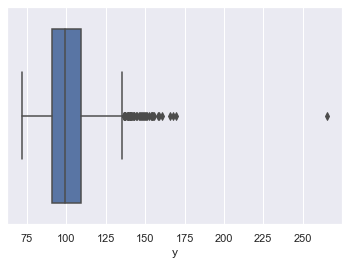

In [8]:
ax = sns.boxplot(data['y'])

### Observations

1. The dataset does not have null values.
2. The dataset does not have duplicate values.
3. The Prediction column y has some outlier points

#### We will first remove these outlier points then we will know the features

#### Knowing the percentiles to decide the threshold to remove the outliers

In [9]:
print("Listing all percentiles for training time: ")
print("100: ", np.percentile(data.y,100))
print("99.9: ", np.percentile(data.y,99.9))
print("99.8: ", np.percentile(data.y,99.8))
print("99.7: ", np.percentile(data.y,99.7))
print("99.6: ", np.percentile(data.y,99.6))
print("99.5: ", np.percentile(data.y,99.5))
print("99 : ", np.percentile(data.y,99))


Listing all percentiles for training time: 
100:  265.32
99.9:  160.38328000000087
99.8:  154.68695999999994
99.7:  151.4276800000003
99.6:  149.0374399999998
99.5:  146.23040000000006
99 :  137.4304


### Observations -

We can see from 99.7 percentile onwards the y value is increasing drastically.
We decide the threshold as 99.7

#### Removing Noise

In [10]:
threshold = np.percentile(data.y,99.7)
outlliers = data[data['y']>=threshold]
data.drop(data[data['y']>=threshold].index, inplace = True)

#### Data Shape after removing noise

In [11]:
data.shape

(4196, 378)

In [12]:
outlliers.head()

ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
342    681  169.91  aa  l  ak  f  d   i  c  d  ...     0     0     0     0   
429    836  154.87  ak  l  ae  f  d   d  g  w  ...     0     0     0     0   
883   1770  265.32   y  r  ai  f  d  ag  l  t  ...     0     0     0     0   
889   1784  158.53  aj  l  as  f  d  ag  k  e  ...     0     0     0     0   
1060  2111  154.43   w  v   r  c  d  ag  d  q  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X385  
342      0     0     0     0     0     0  
429      0     0     0     0     0     0  
883      0     0     0     0     0     0  
889      0     0     0     0     0     0  
1060     0     0     0     0     0     0  

[5 rows x 378 columns]

#### Box-Plot of y after removing noise

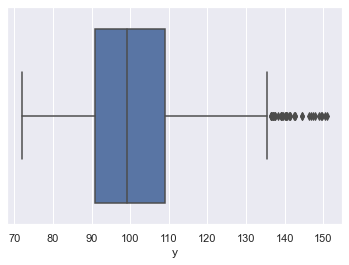

In [13]:
ax = sns.boxplot(data['y'])

### Observations

1. The dataset looks more cleaner now.

#### Log Transformation Distribution of target

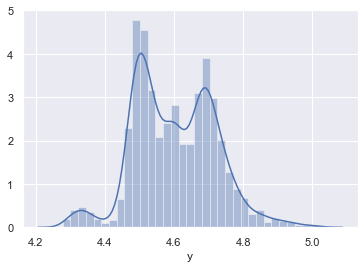

In [59]:
sns.distplot(np.log(data['y']))

#### Log Transformation Distribution of target variable in outlier data

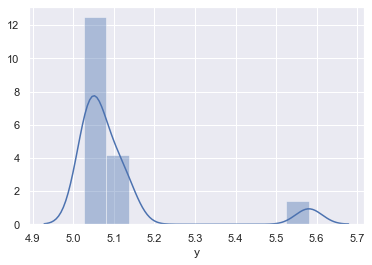

In [61]:
sns.distplot(np.log(outlliers['y']))

### Observations

1. Most of the y values lie between 80 and 140.
2. Only a bunch of values are greater than 150.
3. Few values are less than 80.

### Selecting important features for EDA

#### Building a simple XGBoost Model to get Feature Importances

In [16]:
y = data['y']
x = data.drop(columns = ['ID','y'], axis = 1)
#x = x.drop('id')
x.shape, y.shape
cols = x.columns

In [17]:
x_cat = data.loc[:,'X0':'X8']
x_num = data.loc[:,'X10':]

In [18]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in x_cat.columns:
    x_cat[i] = enc.fit_transform(x_cat[i])

In [19]:
x = pd.DataFrame(np.hstack((x_cat,x_num)), columns = cols)

In [20]:
x.head()

X0  X1  X2  X3  X4  X5  X6  X8  X10  X11  ...  X375  X376  X377  X378  \
0  32  23  17   0   3  24   9  14    0    0  ...     0     0     1     0   
1  32  21  19   4   3  28  11  14    0    0  ...     1     0     0     0   
2  20  24  34   2   3  27   9  23    0    0  ...     0     0     0     0   
3  20  21  34   5   3  27  11   4    0    0  ...     0     0     0     0   
4  20  23  34   5   3  12   3  13    0    0  ...     0     0     0     0   

   X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     1     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 376 columns]

In [21]:
model = XGBRegressor(n_estimators=100, learning_rate = 0.1,n_jobs = -1)
model.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
imp = pd.DataFrame()
imp['columns'] = x.columns
imp['importances'] = model.feature_importances_[0]
result = imp.sort_values(by = 'importances')[:10]

#### Top 10 important features with importances

In [23]:
result

columns  importances
0        X0     0.000737
255    X263     0.000737
254    X262     0.000737
253    X261     0.000737
252    X260     0.000737
251    X259     0.000737
250    X258     0.000737
249    X257     0.000737
248    X256     0.000737
247    X255     0.000737

In [24]:
print("The Top 10 important features are : ", list(result['columns']))

The Top 10 important features are :  ['X0', 'X263', 'X262', 'X261', 'X260', 'X259', 'X258', 'X257', 'X256', 'X255']


### EDA for important Features

#### Knowing important features

In [25]:
imp_features = list(result['columns'])
imp_data = pd.DataFrame()
for i in imp_features:
    imp_data[i] = x[i]

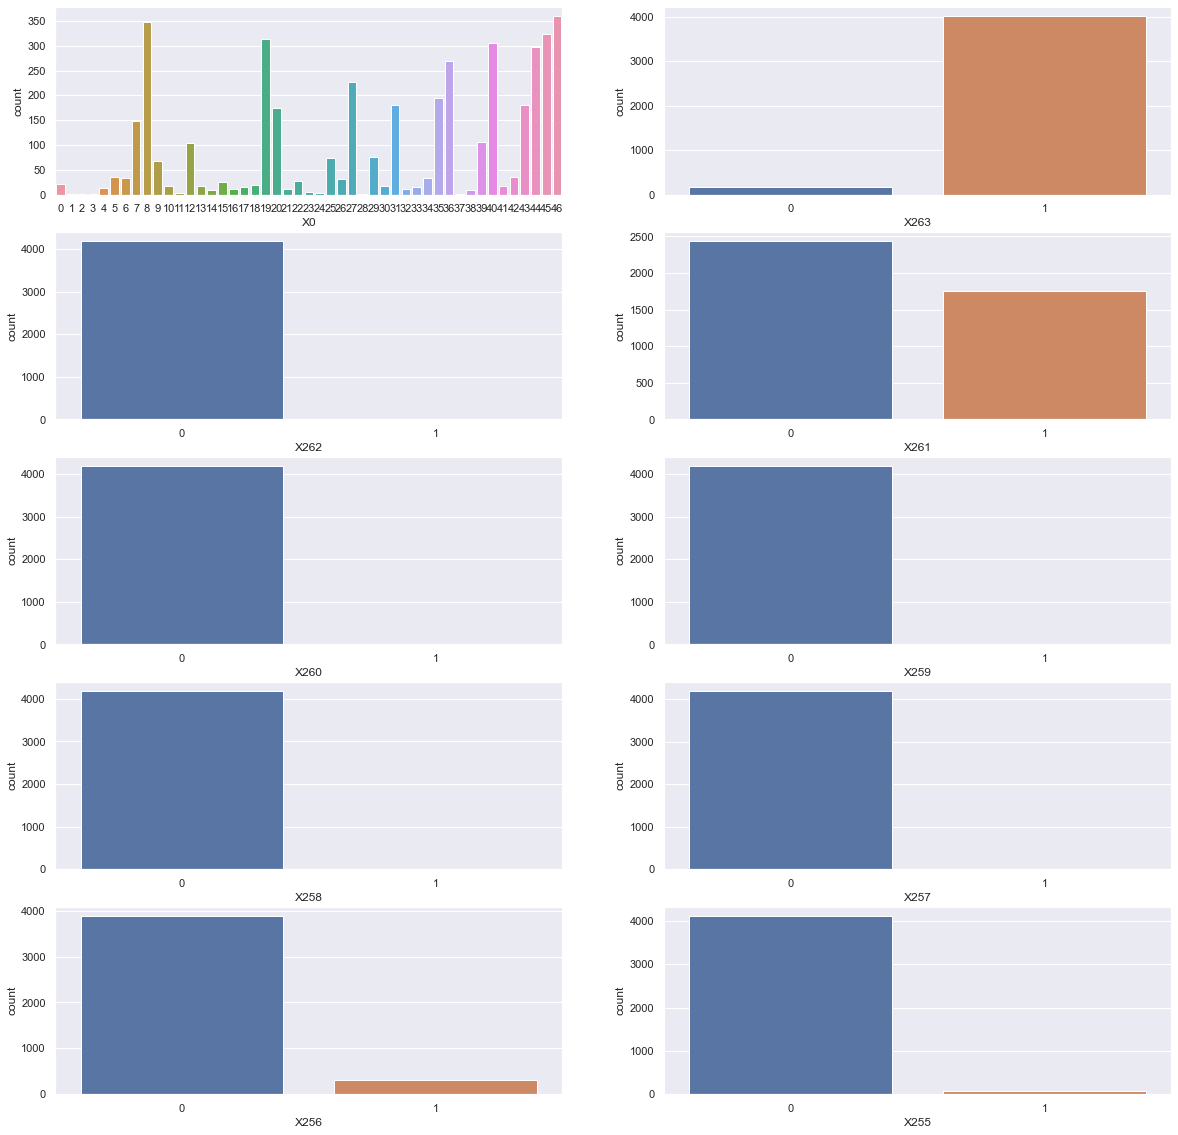

In [26]:
#plotting categorical columns 
fig, ax = plt.subplots(5, 2, figsize=(20, 20))
for variable, subplot in zip(imp_data.columns, ax.flatten()):
    sns.countplot(imp_data[variable], ax=subplot)

### Observations - 

1. The Categorical Feature X0 has well distributed Categories.

2. For the binary features X261 and X263 have significant values of 1 while the rest have mostly 0 values, which means tey are sparse.

#### Univariate Analysis for Important features

#### Box - Plot

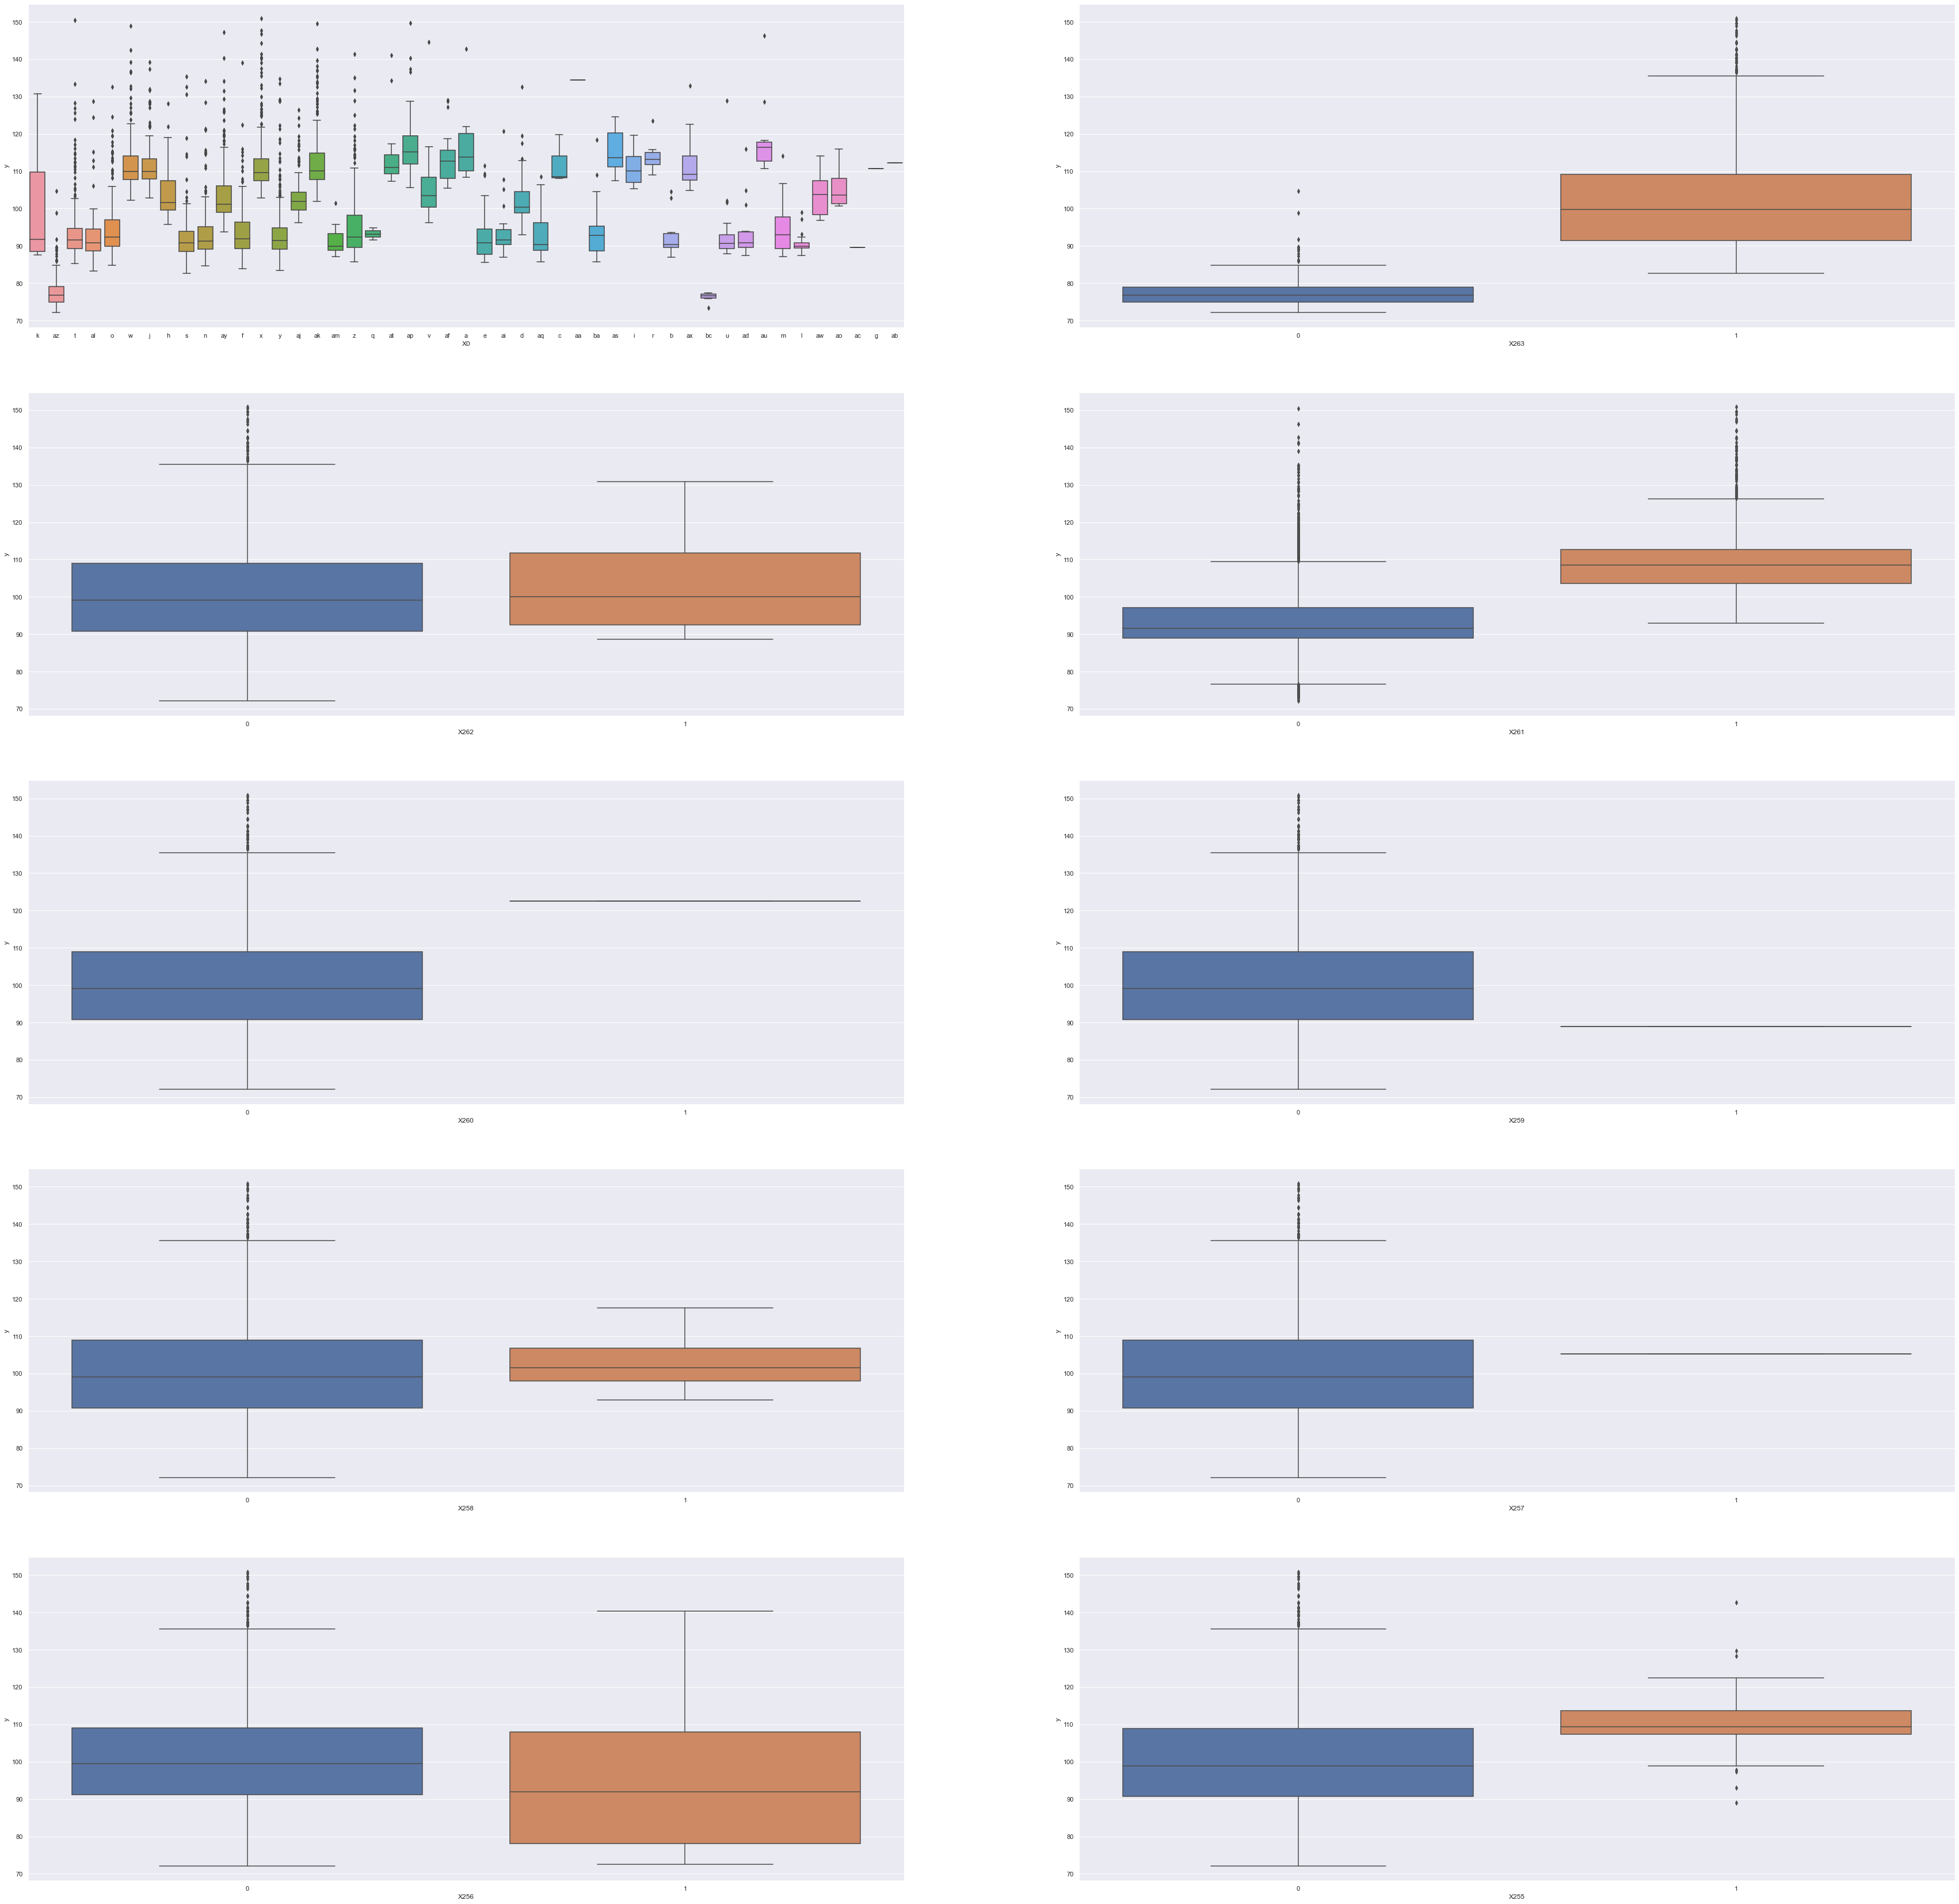

In [27]:
fig, ax = plt.subplots(5, 2, figsize=(60, 60))
for variable, subplot in zip(imp_data.columns, ax.flatten()):
    sns.boxplot(x = data[variable],y = data['y'], ax=subplot)

### Observations - 

1. For binary features X263, X261, X255, X260, X259 the testing time is distinguishable according to the 0 and 1 value.


2. For X0 the percentiles for all the categories is distinguishable so we can interpret the testing time acoording to category.


3. For X263, 0 value indicates testing time less than 85 and 1 value indicates testing time between 80 and 130.


4. For X261, 0 value indicates testing time between 75 and 110 and 1 value indicates testing time between 100 and 130.


#### Line Plot

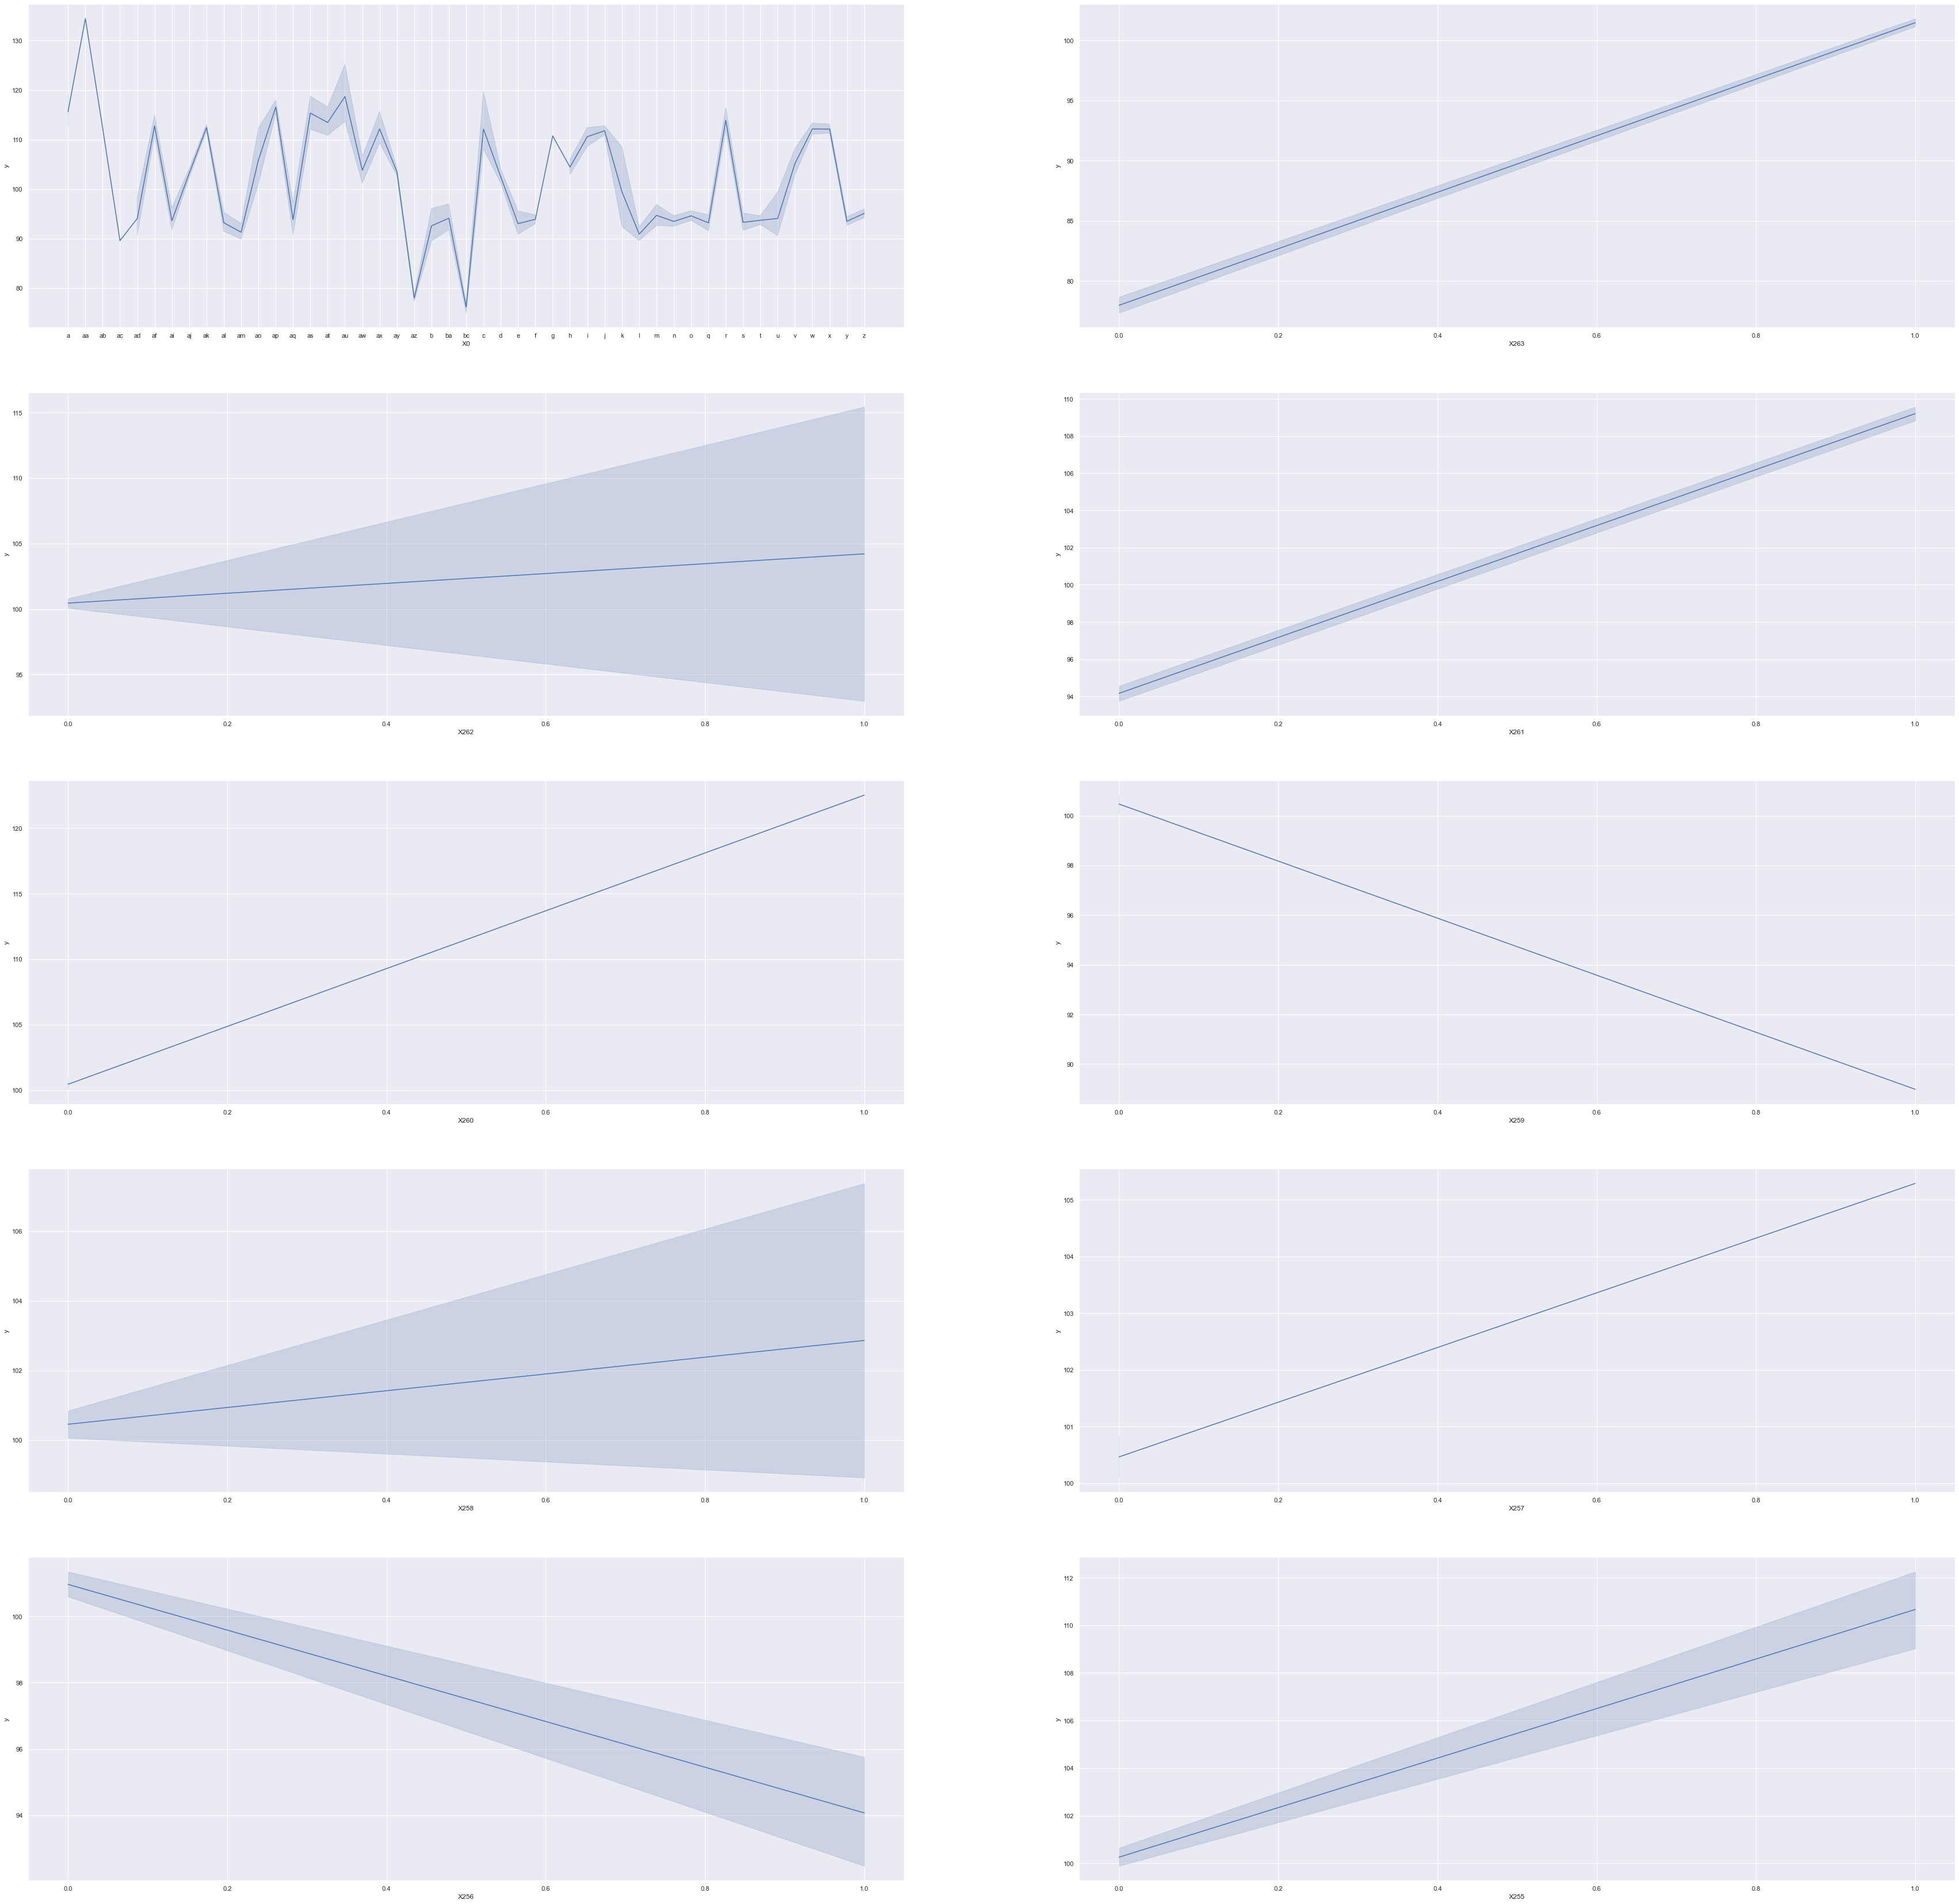

In [28]:
fig, ax = plt.subplots(5, 2, figsize=(60, 60))
for variable, subplot in zip(imp_data.columns, ax.flatten()):
    sns.lineplot(x = data[variable],y = data['y'], ax=subplot)

### Observations - 

1. Line Plot is very interpretable for X0 which has many categories, while for binary features this does not give better information than Box-Plot.


2. For X0 we can conclude that, category 'aa' results in testing time greater than 130 while categories 'az' and 'bc' result in less than 80. The rest lie between 80 and 130.

#### Bi - Variate Analysis of Important Features

### Co - relation of features

### Chi Squared Test

The less realated column pairs are : 
[('X0', 'X260'), ('X0', 'X259'), ('X0', 'X257'), ('X263', 'X262'), ('X263', 'X258'), ('X263', 'X255'), ('X262', 'X261'), ('X262', 'X256'), ('X262', 'X255'), ('X261', 'X260'), ('X261', 'X259'), ('X261', 'X257'), ('X261', 'X255'), ('X260', 'X256'), ('X259', 'X256'), ('X258', 'X256'), ('X257', 'X256')]
The heatmap for chi square values : 
AxesSubplot(0.125,0.125;0.62x0.755)


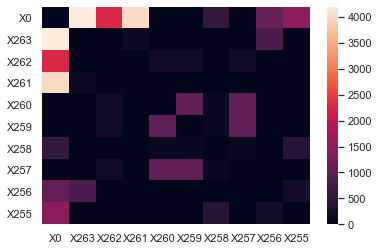

In [30]:
import scipy.stats as stats
rows = imp_data.columns
col =  imp_data.columns
chi2_matrix = pd.DataFrame(columns = col, index = rows)
p_matrix = pd.DataFrame(columns = col, index = rows)
lesser_correlated_cols = []
for i in imp_features:
    for j in imp_features:
        if i != j:
            table = pd.crosstab(imp_data[i],imp_data[j])
            #Observed value 
            obs_val = table.values
            chi2,p,dof,exp = stats.chi2_contingency(table)
            chi2_matrix[i][j] = chi2
            p_matrix[i][j] = p
            if p>=0.05:
                if (j,i) not in lesser_correlated_cols:
                    lesser_correlated_cols.append((i,j))

chi2_matrix = chi2_matrix.fillna(0)
print("The less realated column pairs are : ")
print(lesser_correlated_cols)
print("The heatmap for chi square values : ")
print(sns.heatmap(chi2_matrix))

The P-value matrix is :
AxesSubplot(0.125,0.125;0.62x0.755)


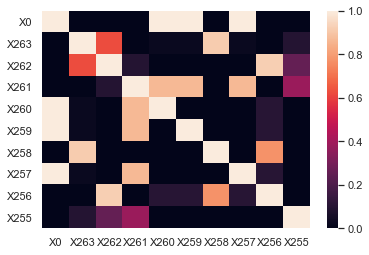

In [31]:
p_matrix = p_matrix.fillna(1)
print("The P-value matrix is :")
print(sns.heatmap(p_matrix))

### Observations - 

1. The pair of less related features are : 

    ('X0', 'X260'), ('X0', 'X259'), ('X0', 'X257'), ('X263', 'X262'), ('X263', 'X258'), ('X263', 'X255'), ('X262', 'X261'), ('X262', 'X256'), ('X262', 'X255'), ('X261', 'X260'), ('X261', 'X259'), ('X261', 'X257'), ('X261', 'X255'), ('X260', 'X256'), ('X259', 'X256'), ('X258', 'X256'), ('X257', 'X256')


2. The above pairs are decided on the basis of p-value, the null hypothesis that the features are not related is accepted.

### Now lets see how these lesser corelated column pairs impact the target together

#### Feature Pairs with XO

In [33]:
'''function to calculate mean of testing time for each pair of categories in the less co related features '''
def mean_with_category(i):
    col1 = i[0]
    col2 = i[1]
    means = {}
    for j in data[col1].unique():
        for k in data[col2].unique():
            temp = data[data[col1] == j]
            temp = temp[temp[col2] == k]
            if not temp.empty:
                target_mean = temp['y'].mean()
                means[(j,k)] = target_mean
    return means
            

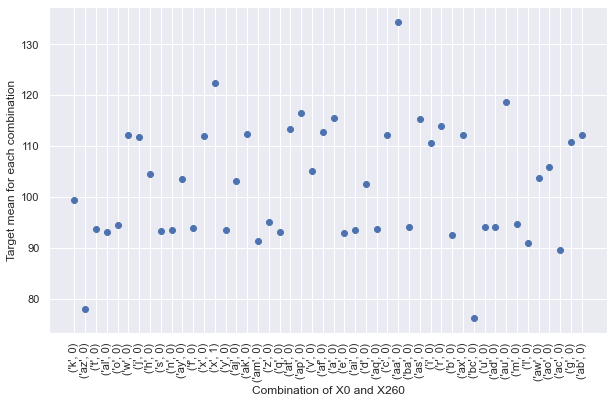

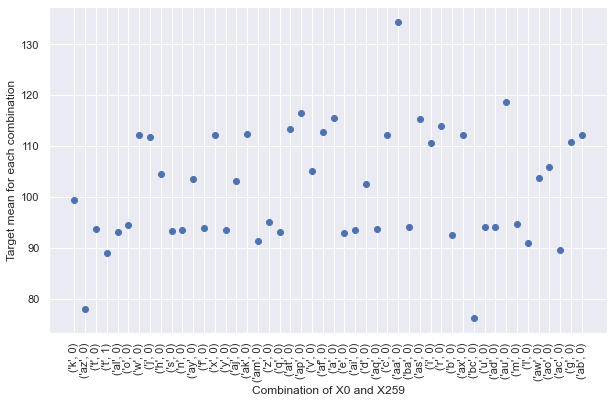

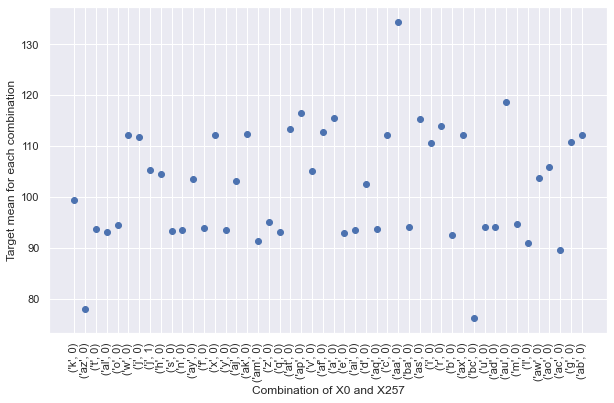

In [34]:
for i in lesser_correlated_cols[:3]:
    ans = mean_with_category(i)
    x_plot = ans.keys()
    y_plot = ans.values()
    
    plt.figure(figsize=(10, 6))
    plt.scatter([str(a) for a in x_plot], y_plot)
    plt.xticks(rotation='vertical')
    plt.xlabel("Combination of "+i[0]+ " and "+i[1])
    plt.ylabel("Target mean for each combination")
   

### Observations - 

1. For the combination X0 with X260, X259, X257, the category 'aa' and value 0 has highest testing time mean and 'bc' and 0 has lowest. 


### Binary-Binary features

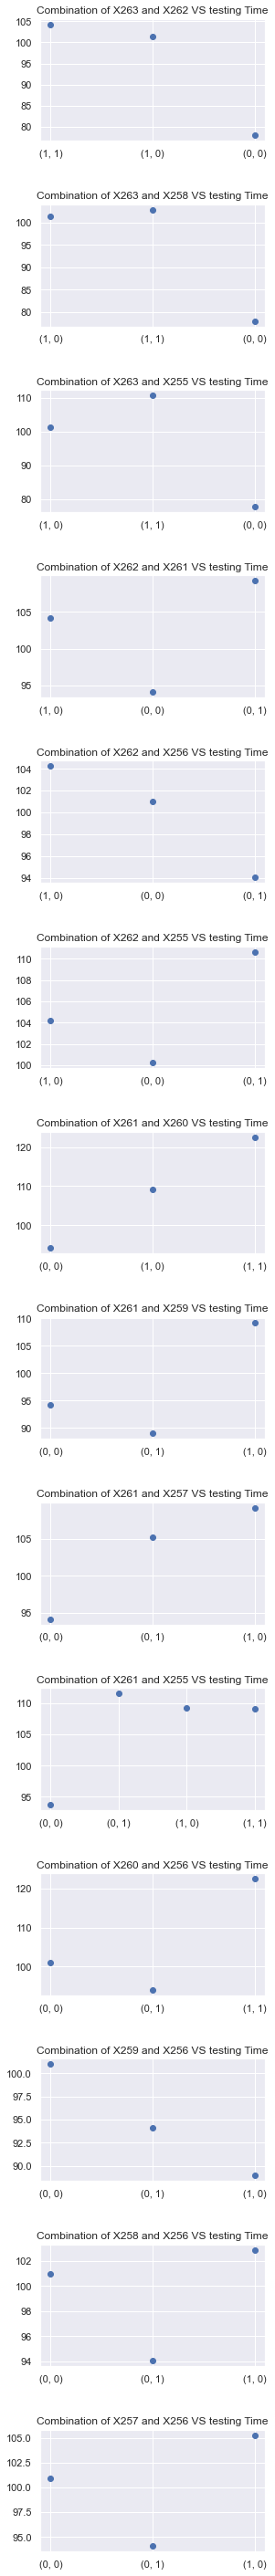

In [35]:
fig, ax = plt.subplots(14, 1, figsize=(5, 40))
for i ,subplot in zip(lesser_correlated_cols[3:], ax.flatten()):
    ans = mean_with_category(i)
    x_plot = ans.keys()
    y_plot = ans.values()
    subplot.scatter([str(a) for a in x_plot], y_plot)
    subplot.set_title("Combination of "+i[0]+ " and "+i[1]+" VS testing Time")
    fig.tight_layout(pad=3.0)

### Observations - 

1. For X263 and X262,

    if both have 0 values the average testing time is less than 80.
    if X263 has 1 and X262 has 0, the average testing time is more than 100.
    if both have value 1, the average testing time is more than 105.


2. For X263 and X258,

    if both have 0 values the average testing time is less than 80.
    if X263 has 1 and X258 has 0, the average testing time is close to 100.
    if both have value 1, the average testing time is more than 100.


3. For X263 and X255,

    if both have 0 values the average testing time is less than 80.
    if X263 has 1 and X255 has 0, the average testing time is close to 100.
    if both have value 1, the average testing time is more than 110.


4. For X262 and X261,

    if both have 0 values the average testing time is less than 95.
    if X262 has 1 and X261 has 0, the average testing time is close to 105.
    if X262 has 0 and X261 has 1, the average testing time is more than 105.


5. For X262 and X256,

    if both have 0 values the average testing time is close to 101.
    if X262 has 1 and X256 has 0, the average testing time is close to 104.
    if X262 has 0 and X261 has 1, the average testing time is more than 94.


6. For X262 and X255,

    if both have 0 values the average testing time is close to 100.
    if X262 has 1 and X255 has 0, the average testing time is close to 104.
    if X262 has 0 and X255 has 1, the average testing time is more than 110.


7. For X261 and X260,

    if both have 0 values the average testing time is less than 100.
    if X261 has 1 and X260 has 0, the average testing time is close to 110.
    if both have value 1, the average testing time is more than 120.


8. For X261 and X259,

    if both have 0 values the average testing time is close to 95.
    if X261 has 0 and X259 has 1, the average testing time is less than 90.
    if X261 has 1 and X259 has 0, the average testing time is close to 110.
 
 
9. For X261 and X257,

    if both have 0 values the average testing time is close to 95.
    if X261 has 0 and X257 has 1, the average testing time is less than 105.
    if X261 has 1 and X257 has 0, the average testing time is close to 110.


10. For X261 and X255,

    if both have 0 values the average testing time is close to 95.
    if X261 has 0 and X255 has 1, the average testing time is more than 110.
    if X261 has 1 and X257 has 0, the average testing time is close to 110.
    if both have value 1, the average testing time is close to 110.
 
 
11. For X260 and X256,

    if both have 0 values the average testing time is close to 100.
    if X260 has 0 and X256 has 1, the average testing time is less than 100.
    if both have value 1, the average testing time is more than 120.
 
 
12. For X259 and X256,

    if both have 0 values the average testing time is close to 100.
    if X259 has 0 and X256 has 1, the average testing time is close to 94.
    if X259 has 1 and X256 has 0, the average testing time is more than 120.
  
  
13. For X258 and X256,

    if both have 0 values the average testing time is close to 101.
    if X258 has 0 and X256 has 1, the average testing time is close to 94.
    if X258 has 1 and X256 has 0, the average testing time is more than 102.
   
   
14. For X257 and X256,

    if both have 0 values the average testing time is close to 101.
    if X257 has 0 and X256 has 1, the average testing time is close to 94.
    if X257 has 1 and X256 has 0, the average testing time is more than 105.

### EDA - Conclusion

#### 1. There are no null and duplicate values in the data.
#### 2. Categorical features seem to hold more information as they are more widely present and also account for testing time geater                 than 130 and less than 80. Also they give information about for testing time between 80 and 130
#### 3. The numerical features are either 0 or 1 with most of the values being 0.
#### 4. The most important features are 'X0', 'X263', 'X262', 'X261', 'X260', 'X259', 'X258', 'X257', 'X256', 'X255'
#### 5. The prediction column y has most values between 80 and 150.

# Feature Engineering

In [37]:
# split into train test sets
from sklearn.model_selection import train_test_split
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
print("Done")

Done


### Baseline model 

#### model which outputs mean

In [38]:
y_pred_value  = y_train.mean()
y_pred = []
for i in range(0,len(y_test)):
    y_pred.append(y_pred_value)

In [39]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

-0.002042687819177935


In [40]:
x.head()

X0  X1  X2  X3  X4  X5  X6  X8  X10  X11  ...  X375  X376  X377  X378  \
0  32  23  17   0   3  24   9  14    0    0  ...     0     0     1     0   
1  32  21  19   4   3  28  11  14    0    0  ...     1     0     0     0   
2  20  24  34   2   3  27   9  23    0    0  ...     0     0     0     0   
3  20  21  34   5   3  27  11   4    0    0  ...     0     0     0     0   
4  20  23  34   5   3  12   3  13    0    0  ...     0     0     0     0   

   X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     1     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 376 columns]

In [41]:
# split into train test sets
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
print("Done")

Done


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
 #train autoencoder for regression with no compression in the bottleneck layer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from keras import backend as K

In [45]:
n_inputs = x.shape[1]

In [47]:
# define encoder
input_data = Input(shape=(n_inputs,))
#encoder level 1
encoder = Dense(n_inputs*2)(input_data)
encoder = BatchNormalization()(encoder)
encoder = LeakyReLU()(encoder)

# define bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(encoder)

# decoder level 2
decoder = Dense(n_inputs*2)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [48]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 376)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 752)               283504    
_________________________________________________________________
batch_normalization_1 (Batch (None, 752)               3008      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 752)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 376)               283128    
_________________________________________________________________
dense_5 (Dense)              (None, 752)               283504    
_________________________________________________________________
batch_normalization_2 (Batch (None, 752)               3008  

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/400
176/176 - 3s - loss: 5556.4712 - val_loss: 1782.9253
Epoch 2/400
176/176 - 1s - loss: 512.0928 - val_loss: 502.6837
Epoch 3/400
176/176 - 1s - loss: 157.7329 - val_loss: 185.0869
Epoch 4/400
176/176 - 1s - loss: 118.4300 - val_loss: 173.9447
Epoch 5/400
176/176 - 1s - loss: 103.6975 - val_loss: 139.9839
Epoch 6/400
176/176 - 1s - loss: 103.8155 - val_loss: 123.9464
Epoch 7/400
176/176 - 1s - loss: 96.5262 - val_loss: 150.4998
Epoch 8/400
176/176 - 1s - loss: 90.9939 - val_loss: 95.8988
Epoch 9/400
176/176 - 1s - loss: 81.2611 - val_loss: 100.8224
Epoch 10/400
176/176 - 2s - loss: 81.6729 - val_loss: 89.8388
Epoch 11/400
176/176 - 2s - loss: 83.3211 - val_loss: 96.6176
Epoch 12/400
176/176 - 2s - loss: 81.8898 - val_loss: 107.0758
Epoch 13/400
176/176 - 2s - loss: 77.1092 - val_loss: 87.3325
Epoch 14/400
176/176 - 1s - loss: 71.3

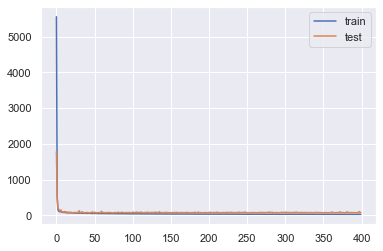

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [49]:
# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)

# fit the autoencoder model to reconstruct input
history = model.fit(X_train, y_train, epochs=400, batch_size=16, verbose=2, validation_data=(X_test,y_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data, outputs=bottleneck)
plot_model(encoder, 'encoder.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [50]:
from tensorflow.keras.models import load_model
# load the model from file
encoder = load_model('encoder.h5')

In [51]:
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)



In [52]:
X_train_encode.shape

(2811, 376)

### Random XGBoost Model with encoded Features

In [53]:
reg = XGBRegressor(n_estimators=100, learning_rate = 0.1)
reg.fit(X_train_encode,y_train)
y_pred = reg.predict(X_test_encode)
score = r2_score(y_test, y_pred)
print(score)

0.4418955976553791


### Observation - 

The Random XGBoost Model with encoded features produces better r2 than Simple mean model

## Some Other Feature Engg Techniques

### PCA Features

In [54]:
from sklearn.decomposition import PCA
#taking top 10 components
components = 10 
pca = PCA(n_components=components, random_state=420)

x_pca = pd.DataFrame(pca.fit_transform(x_num))

print(x_pca.shape)
print(x_pca.head())

(4196, 10)
          0         1         2         3         4         5         6  \
0  0.749079  2.255215  1.016952  0.929835  1.388466  0.044720  0.608854   
1 -0.216276  1.103237 -0.832779 -0.670249  0.243599  0.037451  1.199850   
2 -0.888967  2.978889  0.269069  2.570786 -0.994356  3.279242 -0.877726   
3 -0.509223  2.445044 -0.645017  2.985013 -1.728502  3.132381  0.108157   
4 -0.488367  2.236544 -0.787629  3.193679 -2.052340  3.167224 -0.091210   

          7         8         9  
0 -0.929240  0.200321 -0.730352  
1 -0.563451 -0.083035  0.459006  
2  0.533689 -0.939597 -0.102745  
3  0.017575 -1.028170  0.260647  
4  0.125130 -1.729599 -0.344936  


### SVD

In [55]:
# get the matrix factors
U, S, VT = np.linalg.svd(x_num,full_matrices=1)
# calculating the aspect ratio b
m = x_num.shape[1]
n = x_num.shape[0]
b = m/n

#taking w_b from table correspondng to b
w_b = 1.6089

# getting the median singular value
ymed = np.median(S)

# finding the  Hard threshold
cutoff = w_b * ymed 
print("The Hard Threshold for Truncation = ",cutoff)
# get the number of components
r = np.max(np.where(S > cutoff))
print("Number of total components to be selected = ",r)

The Hard Threshold for Truncation =  3.8431396016312185
Number of total components to be selected =  152


In [56]:
from sklearn.decomposition import TruncatedSVD
n_comp = r

tsvd = TruncatedSVD(n_components=r, random_state=420)

x_svd= tsvd.fit_transform(x_num)


print(x_svd.shape)

(4196, 152)
